<a href="https://colab.research.google.com/github/WilliamAshbee/splineexample/blob/main/CubicSpline_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/patrick-kidger/torchcubicspline.git


  Cloning https://github.com/patrick-kidger/torchcubicspline.git to /tmp/pip-req-build-k0ojodzt
  Running command git clone -q https://github.com/patrick-kidger/torchcubicspline.git /tmp/pip-req-build-k0ojodzt
  Created wheel for torchcubicspline: filename=torchcubicspline-0.0.2-cp36-none-any.whl size=12441 sha256=332c47178cfe563a7ff103e013b7a72e8142ca83d9392bd7587b15a45a1e2316
  Stored in directory: /tmp/pip-ephem-wheel-cache-n_ywihro/wheels/c5/49/e6/a57d243e35e46b1bbb7abdad669099438dee56d72bd3d6fe43
Successfully built torchcubicspline


In [43]:
import torch
from torchcubicspline import(natural_cubic_spline_coeffs, 
                             NaturalCubicSpline)
import math

length, channels = 20, 2
t = torch.linspace(0, math.pi*2.0, length)
x = torch.zeros(length, channels)
x[:,0] = t.sin()
x[:,1] = t.cos()
t = torch.linspace(0.0, 1.0, length)

coeffs = natural_cubic_spline_coeffs(t, x)
spline = NaturalCubicSpline(coeffs)
#point = torch.tensor(0.4)
points = torch.linspace(0, 1, 50)
out = spline.evaluate(points)


In [44]:
out

tensor([[ 0.0000e+00,  1.0000e+00],
        [ 1.2787e-01,  9.8635e-01],
        [ 2.5365e-01,  9.6488e-01],
        [ 3.7526e-01,  9.2794e-01],
        [ 4.9070e-01,  8.7255e-01],
        [ 5.9811e-01,  8.0156e-01],
        [ 6.9566e-01,  7.1795e-01],
        [ 7.8182e-01,  6.2325e-01],
        [ 8.5514e-01,  5.1844e-01],
        [ 9.1438e-01,  4.0487e-01],
        [ 9.5866e-01,  2.8455e-01],
        [ 9.8716e-01,  1.5957e-01],
        [ 9.9946e-01,  3.2029e-02],
        [ 9.9538e-01, -9.6020e-02],
        [ 9.7490e-01, -2.2251e-01],
        [ 9.3846e-01, -3.4536e-01],
        [ 8.8659e-01, -4.6253e-01],
        [ 8.2015e-01, -5.7210e-01],
        [ 7.4028e-01, -6.7230e-01],
        [ 6.4821e-01, -7.6142e-01],
        [ 5.4552e-01, -8.3807e-01],
        [ 4.3388e-01, -9.0096e-01],
        [ 3.1510e-01, -9.4903e-01],
        [ 1.9116e-01, -9.8156e-01],
        [ 6.4072e-02, -9.9792e-01],
        [-6.4072e-02, -9.9792e-01],
        [-1.9116e-01, -9.8156e-01],
        [-3.1510e-01, -9.490

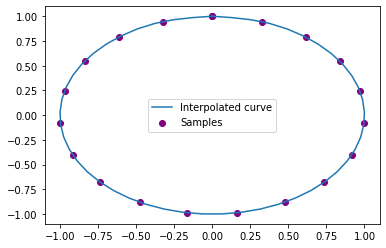

In [45]:
import matplotlib.pylab as P
P.scatter(x[:,0], x[:,1], label='Samples', color='purple')
P.plot(out[:,0], out[:,1], label='Interpolated curve')
#P.plot(xs, xs.sin(), '--', label='True Curve')
#P.plot(xs, Ys, label='Spline Integral')
#P.plot(xs, 1-xs.cos(), '--', label='True Integral')
P.legend()
P.show()

In [53]:
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self,outclass = 101):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(40, 40),
            nn.ReLU(),
            nn.Linear(40, 40),
            nn.ReLU(),
            nn.Linear(40, 40),
            nn.ReLU(),
            nn.Linear(40, outclass),
            nn.Tanh()
        )
        
    def forward(self, x):
        # convert tensor (128, 1, 28, 28) --> (128, 1*28*28)
        x = self.layers(x)
        x=x*5.0
        return x


In [68]:
import torch as T
oc = 40
model = MLP(outclass=oc)
optimizer = T.optim.Adam(model.parameters(), lr=.00001)
x = T.linspace(0, 30, 25)
xs = T.linspace(0, 30, 100)
xoc = T.linspace(0, 30, oc)
print(xoc.shape)


torch.Size([40])


In [70]:
length, channels = 20, 2
for i in range(1000):
  t = torch.linspace(0, math.pi*2.0, length)
  x = torch.zeros(length, channels)
  x[:,0] = t.sin()
  x[:,1] = t.cos()
  t = torch.linspace(0.0, 1.0, length)

  gtcoeffs = natural_cubic_spline_coeffs(t, x)
  gtspline = NaturalCubicSpline(coeffs)
  #point = torch.tensor(0.4)
  gtpoints = torch.linspace(0, 1, 50)
  gtout = spline.evaluate(points)
  x = x.flatten()
  pout = model(x)
  pout = pout.reshape(20,-1)
  t = torch.linspace(0, math.pi*2.0, length)
  pcoeffs = natural_cubic_spline_coeffs(t, pout)
  pspline = NaturalCubicSpline(pcoeffs)
  ppoints = torch.linspace(0, 1, 50)
  pout = spline.evaluate(points)
  gtout.requires_grad = False
  loss = torch.mean((gtout-pout)**2)
  loss.backward()
  optimizer.step()


RuntimeError: ignored

In [60]:
print(pout.shape)


torch.Size([2, 20])
